In [34]:
# Import necessary libraries
import pandas as pd
import pip  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the dataset from an Excel file
df = pd.read_excel('credit.xlsx')  # Adjust your path as necessary
print("\nload credit data.")


load credit data.


In [36]:
# 1. Overview of the Data
print("Data Overview:")
print(df.info())
print("\nNumber of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95660 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95660 non-null  float64
 7   ProviderId            95660 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95659 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float64
 15  Frau

In [37]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95660   
unique                95662          94809            3633   
top     TransactionId_35670  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95660.0   
unique                 3627             3742            1          NaN   
top     Subs

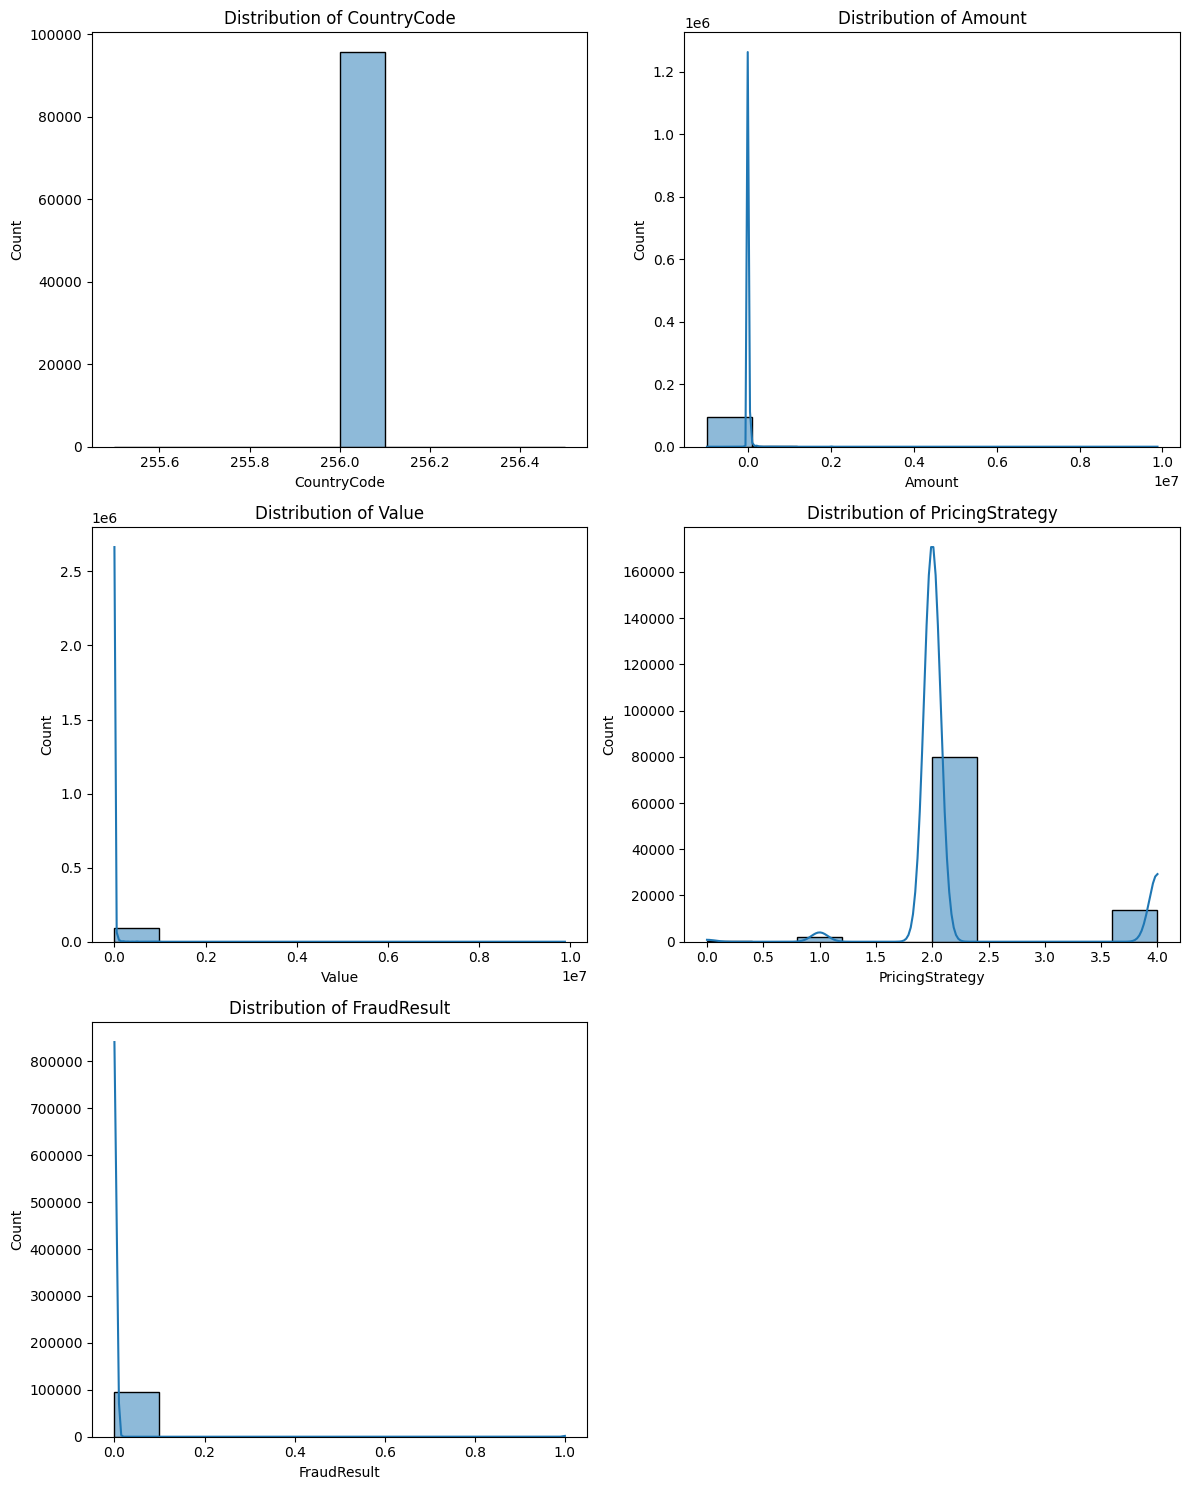

In [38]:
# 3. Distribution of Numerical Features
numeric_columns = df.select_dtypes(include=['number']).columns
num_columns = len(numeric_columns)

# Calculate the number of rows needed for the subplots
num_rows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 2, i)  # Adjust columns to 2
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

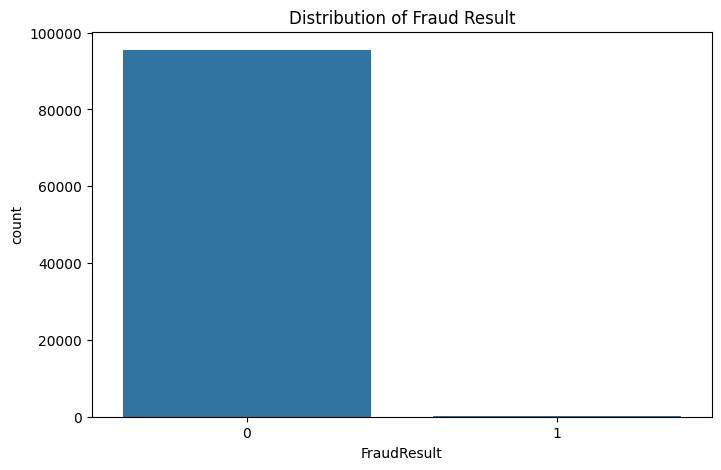

In [39]:
# 4. Distribution of Categorical Features
plt.figure(figsize=(8, 5))
sns.countplot(x='FraudResult', data=df)  # Adjust column name as necessary
plt.title('Distribution of Fraud Result')
plt.show()

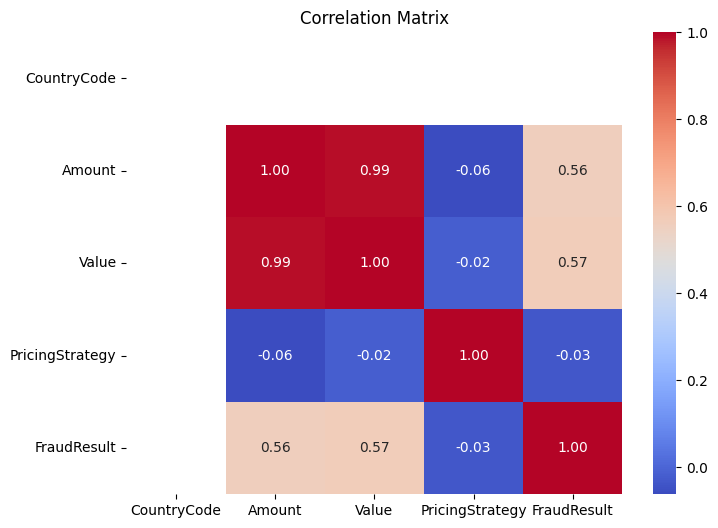

In [40]:
# 5. Correlation Analysis
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [41]:
# 6. Identifying Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
TransactionId               0
BatchId                     0
AccountId                   2
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 2
ProviderId                  2
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       3
TransactionStartTime        1
PricingStrategy             3
FraudResult                 0
Unnamed: 16             95646
Unnamed: 17             95650
dtype: int64


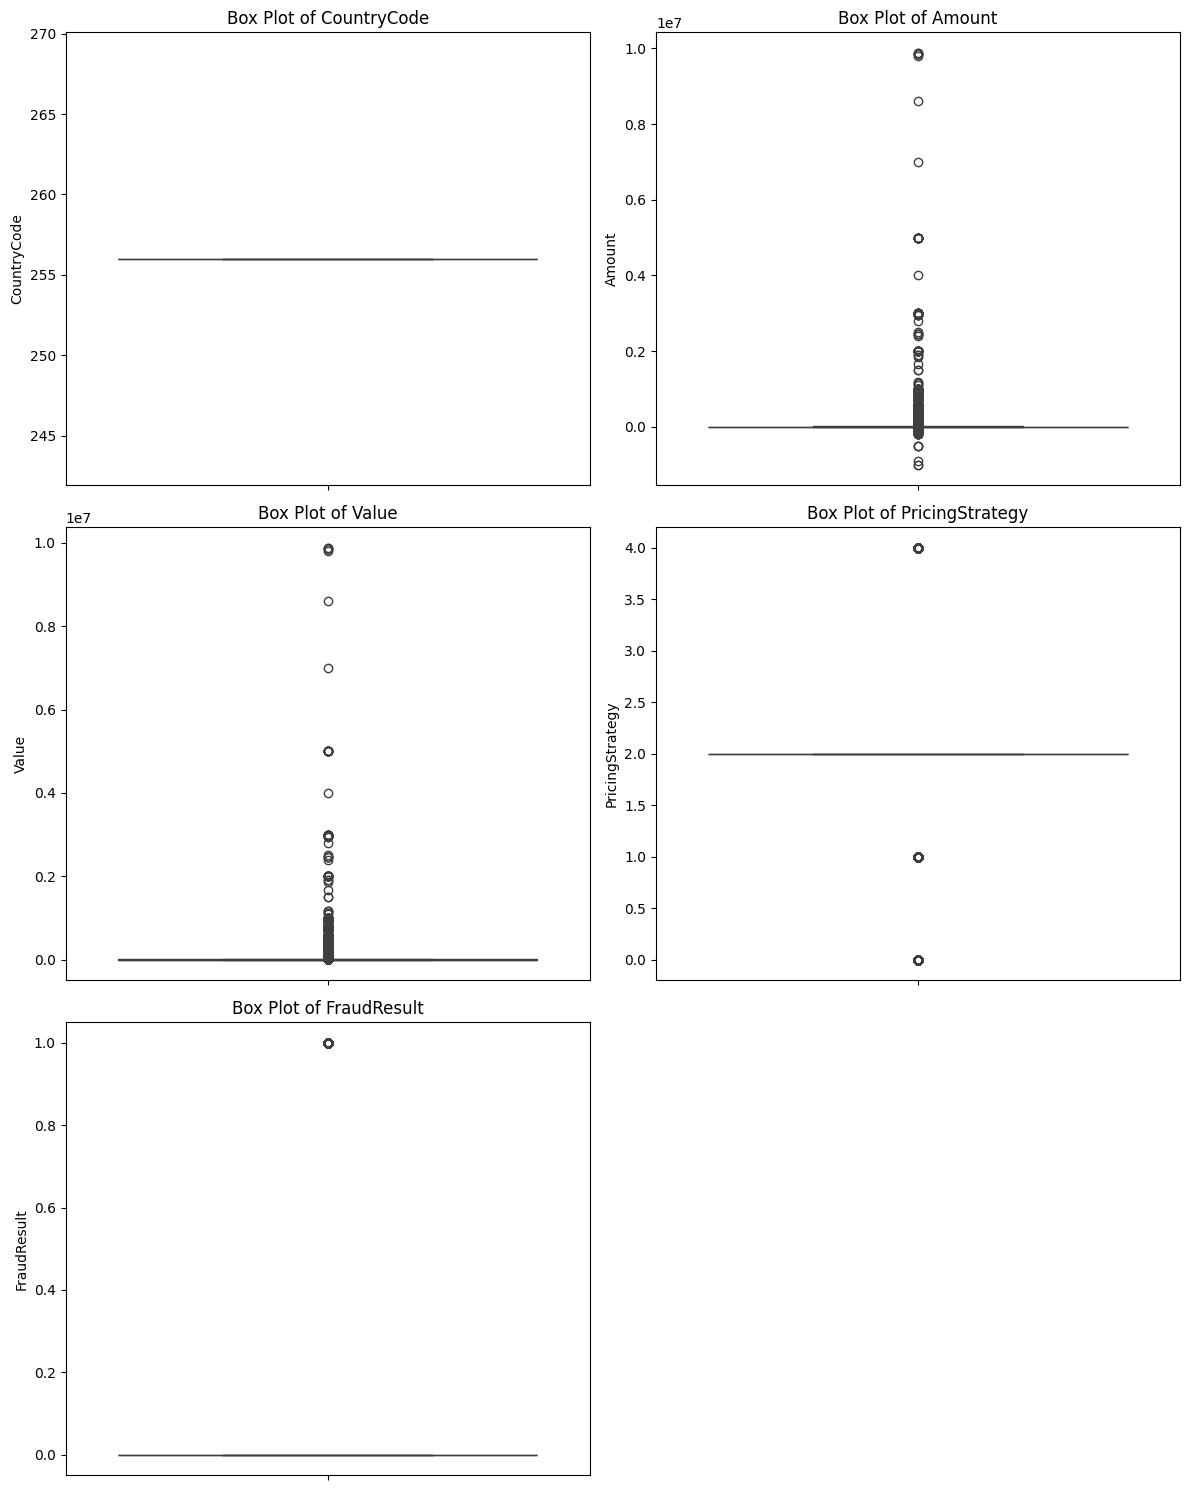

In [42]:
#  Outlier Detection using Box Plots
numeric_columns = df.select_dtypes(include=['number']).columns
num_columns = len(numeric_columns)

# Calculate the number of rows needed for the subplots
num_rows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 2, i)  # Adjust columns to 2
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

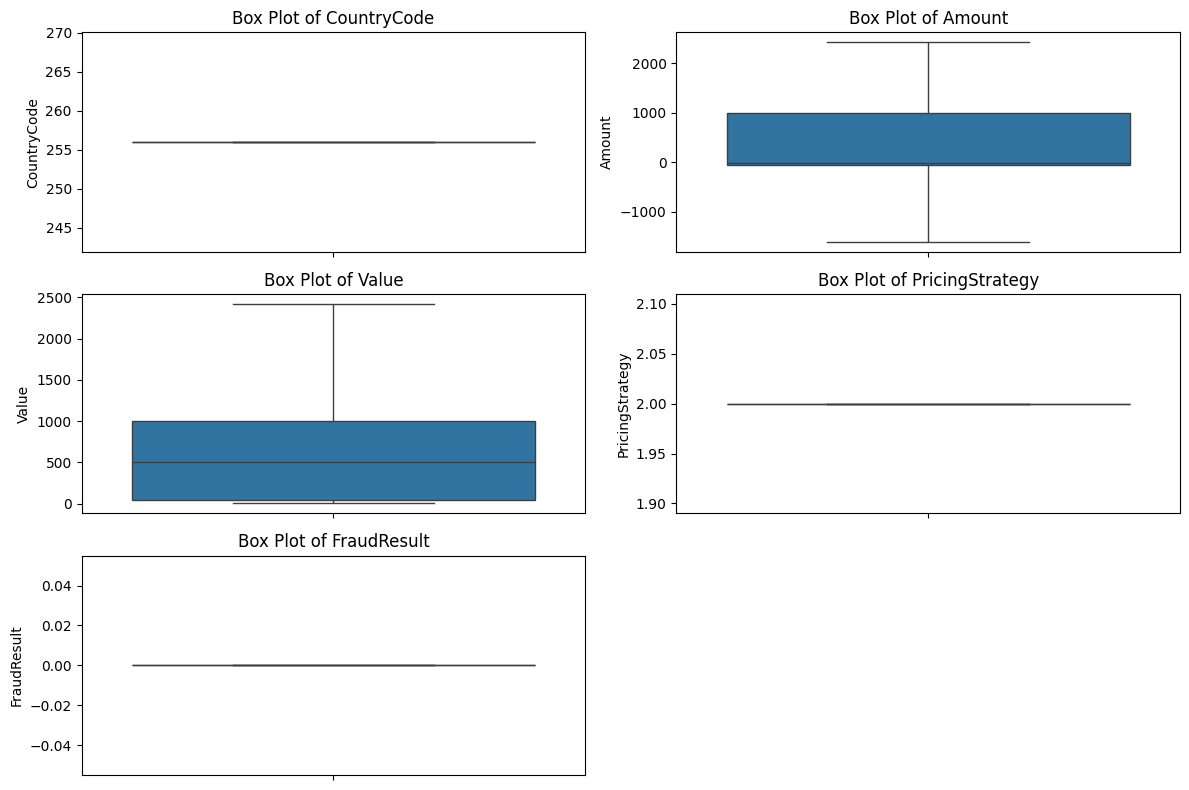


Data Overview after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 54942 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         54942 non-null  object 
 1   BatchId               54942 non-null  object 
 2   AccountId             54942 non-null  object 
 3   SubscriptionId        54942 non-null  object 
 4   CustomerId            54942 non-null  object 
 5   CurrencyCode          54942 non-null  object 
 6   CountryCode           54942 non-null  float64
 7   ProviderId            54941 non-null  object 
 8   ProductId             54942 non-null  object 
 9   ProductCategory       54942 non-null  object 
 10  ChannelId             54942 non-null  object 
 11  Amount                54942 non-null  float64
 12  Value                 54942 non-null  float64
 13  TransactionStartTime  54942 non-null  object 
 14  PricingStrategy       54942 non-null  float6

In [45]:
# 7. Data Cleaning
# a. Handling Missing Values
# Fill with median for numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)  # Direct assignment

# Drop rows with missing values for categorical columns
df = df.dropna(subset=['FraudResult'])  # Adjust column name as necessary

# b. Removing Duplicates
df.drop_duplicates(inplace=True)

# c. Outlier Detection using Box Plots
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

# Adjust subplot layout based on the number of numeric columns
num_rows = (num_columns // 2) + (num_columns % 2)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 2, i)  # Dynamic rows and 2 columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# d. Optional: Handling Outliers
# Remove rows where any numeric feature is outside 1.5 * IQR
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Final Data Overview after cleaning
print("\nData Overview after Cleaning:")
print(df.info())
print("\nNumber of Rows after Cleaning:", df.shape[0])

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data1.csv', index=False)  # Adjust your path as necessary
print("\nCleaned data saved to 'cleaned_data1.csv'.")